In [3]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster

# Figures inline and set visualization style
%matplotlib inline
sns.set()
plt.style.use('ggplot')

In [8]:
# Import data
df = pd.read_csv('data_1024.csv', delimiter='\t')
#df = pd.read_csv('http://www.biz.uiowa.edu/faculty/jledolter/DataMining/protein.csv')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


In [18]:
df.shape

(4000, 3)

In [19]:
# Getting the values and plotting it
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values



Text(0, 0.5, 'speeding')

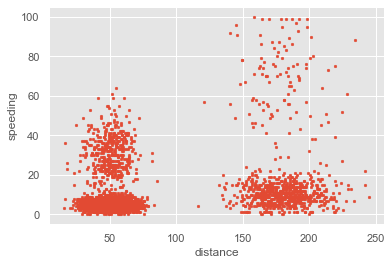

In [21]:
plt.scatter(f1, f2, s=7)
plt.xlabel('distance')
plt.ylabel('speeding')

Here we can actually see that there are 2 clusters

In [22]:
# Processing only distance and speeding features
df_2_vars = df.drop(['Driver_ID'], axis=1)
df_2_vars.head()
#df_2_vars = df[['Distance_Feature', 'Speeding_Feature']]

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


## K-Means Clustering

In [23]:
# Perform clustering with k = 2
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_2_vars)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
cluster.KMeans?

In [25]:
labels = kmeans.predict(df_2_vars)
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [26]:
Centroids = kmeans.cluster_centers_
C_x = Centroids[:,0]
C_y = Centroids[:,1]
Centroids

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

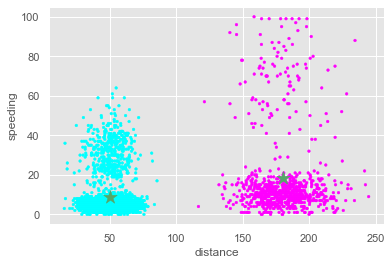

In [27]:
# Plotting along with the Centroids
plt.xlabel('distance')
plt.ylabel('speeding')
plt.scatter(f1, f2, c=labels, s=7, cmap = plt.cm.cool)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
#plt.scatter?

In [21]:
f1

array([ 71.24,  52.53,  64.54, ..., 170.91, 176.14, 168.03])

In [26]:
# How about k = 4?
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_2_vars)
labels = kmeans.predict(df_2_vars)

Centroids = kmeans.cluster_centers_
C_x = Centroids[:,0]
C_y = Centroids[:,1]

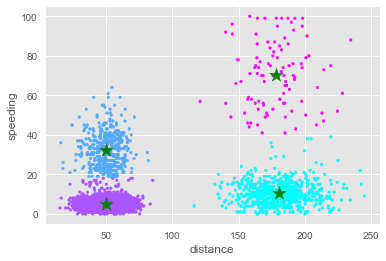

In [27]:
# Plotting along with the Centroids
plt.xlabel('distance')
plt.ylabel('speeding')
plt.scatter(f1, f2, c=labels, s=7, cmap = plt.cm.cool)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [15]:
Centroids

array([[  50.40482436,   32.36533958],
       [ 180.34311782,   10.52011494],
       [  49.99263253,    5.20447169],
       [ 177.83509615,   70.28846154]])

## Mean Shift Clustering

In [39]:
MS = cluster.MeanShift()
MS.fit(df_2_vars)
labels = MS.labels_
labels

Centroids = MS.cluster_centers_
C_x = Centroids[:,0]
C_y = Centroids[:,1]

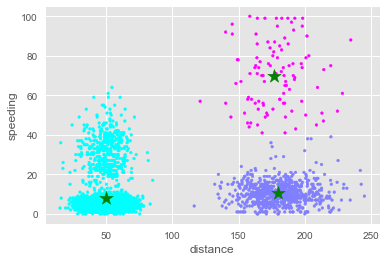

In [40]:
# Plotting along with the Centroids
plt.xlabel('distance')
plt.ylabel('speeding')
plt.scatter(f1, f2, c=labels, s=7, cmap = plt.cm.cool)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')